In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-stocks/sp_500_stocks.csv


In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 3.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=678f166d4ab475d53c6a07712c776bc5a89c1507f87729a4f5e245f4de7f0a90
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


# Momentum Strategy

In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import yfinance as yf

In [37]:
gold_ticker='GLD'
data=yf.download(gold_ticker, start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [38]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,121.349998,121.750000,120.879997,121.330002,121.330002,12776200
2019-01-03,121.779999,122.459999,121.730003,122.430000,122.430000,15440800
2019-01-04,121.320000,121.599998,120.690002,121.440002,121.440002,13334000
2019-01-07,122.160004,122.220001,121.570000,121.860001,121.860001,7473600
2019-01-08,121.150002,121.709999,121.059998,121.529999,121.529999,7643100


In [39]:
day=np.arange(1,len(data)+1)
data['day']=day


In [40]:
data.drop(columns=['Adj Close','Volume'],inplace=True)

In [41]:
data=data[['day','Open','High','Low','Close']]
data.head()

,day,Open,High,Low,Close
Date,,,,,
2019-01-02,1,121.349998,121.750000,120.879997,121.330002
2019-01-03,2,121.779999,122.459999,121.730003,122.430000
2019-01-04,3,121.320000,121.599998,120.690002,121.440002
2019-01-07,4,122.160004,122.220001,121.570000,121.860001
2019-01-08,5,121.150002,121.709999,121.059998,121.529999


In [54]:
data['9-day']=data['Close'].rolling(9).mean()
data['21-day']=data['Close'].rolling(21).mean()


/tmp/ipykernel_33/3181402865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['9-day']=data['Close'].rolling(9).mean()
/tmp/ipykernel_33/3181402865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['21-day']=data['Close'].rolling(21).mean()


In [55]:
data['signal']=np.where(data['9-day']>data['21-day'],1,0)
data['signal']=np.where(data['9-day']<data['21-day'],-1,data['signal'])
data.dropna(inplace=True)

/tmp/ipykernel_33/3253688678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal']=np.where(data['9-day']>data['21-day'],1,0)
/tmp/ipykernel_33/3253688678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal']=np.where(data['9-day']<data['21-day'],-1,data['signal'])
/tmp/ipykernel_33/3253688678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [56]:
data['return']=np.log(data['Close']).diff()
data['system_return']=data['return']*data['signal']
data['entry']=data['signal'].diff()
data.head()

/tmp/ipykernel_33/4257779554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['return']=np.log(data['Close']).diff()
/tmp/ipykernel_33/4257779554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['system_return']=data['return']*data['signal']
/tmp/ipykernel_33/4257779554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2019-03-04,42,121.559998,121.849998,121.180000,121.559998,124.455556,124.315238,1,NaN,NaN,NaN
2019-03-05,43,121.379997,121.730003,121.029999,121.720001,123.926667,124.182857,-1,0.001315,-0.001315,-2.0
2019-03-06,44,121.430000,121.639999,121.260002,121.610001,123.544445,124.070953,-1,-0.000904,0.000904,0.0
2019-03-07,45,121.269997,121.709999,121.180000,121.510002,123.101112,123.939048,-1,-0.000823,0.000823,0.0
2019-03-08,46,122.699997,122.889999,122.370003,122.839996,122.820000,123.910476,-1,0.010886,-0.010886,0.0


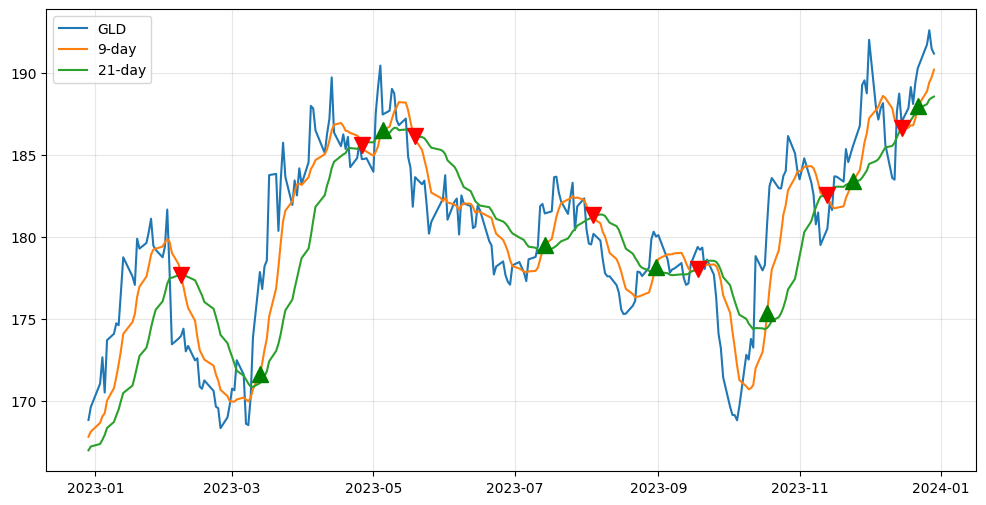

In [59]:
plt.rcParams['figure.figsize']=12,6
plt.grid(True,alpha=.3)
plt.plot(data.iloc[-252:]['Close'],label='GLD')
plt.plot(data.iloc[-252:]['9-day'],label='9-day')
plt.plot(data.iloc[-252:]['21-day'],label='21-day')
plt.plot(data.iloc[-252:].loc[data.entry==2].index,data[-252:]['9-day'][data.entry==2],'^',color='g',markersize=12)
plt.plot(data.iloc[-252:].loc[data.entry==-2].index,data[-252:]['21-day'][data.entry==-2],'v',color='r',markersize=12)
plt.legend(loc=2)

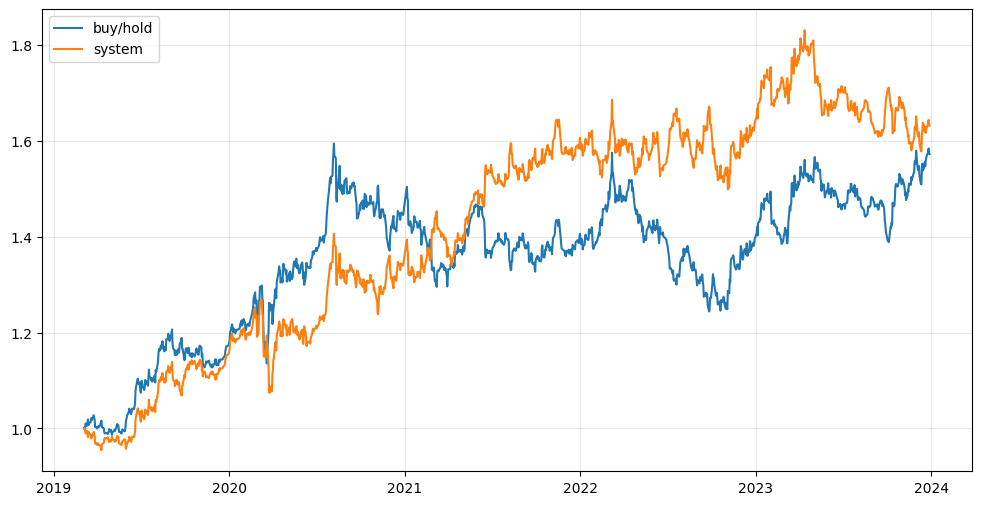

In [58]:
plt.plot(np.exp(data['return']).cumprod(),label='buy/hold')
plt.plot(np.exp(data['system_return']).cumprod(),label='system')
plt.legend(loc=2)
plt.grid(True,alpha=0.3)

# Quant Strategy: Pairs Trading Algorithm (Mean Reversion)

In [5]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start='2020-10-27', end='2021-10-27').iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","GS","XOM","NKE","BRK-B", "MSFT"] #Name of company 
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(252, 14)


,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,GS,XOM,NKE,BRK-B,MSFT
Date,,,,,,,,,,,,,,
2021-10-20,446.019104,147.171005,142.414993,116.389999,46.130001,436.987366,625.140015,216.169998,47.004406,380.478516,58.059048,153.937576,287.489990,300.772003
2021-10-21,455.142212,147.387924,142.780502,119.330002,45.427502,438.127136,653.159973,214.339996,47.265182,380.198700,57.004246,157.561356,286.820007,304.049713
2021-10-22,451.611633,146.608948,138.625000,119.820000,42.450001,437.673157,664.780029,212.970001,47.757763,386.476440,57.395248,158.824341,289.239990,302.484283
2021-10-25,453.469330,146.559677,138.772995,122.360001,43.492500,440.020294,671.659973,212.869995,48.311516,386.877533,58.513691,159.543274,290.260010,301.476471
2021-10-26,453.021912,147.230164,139.671997,122.930000,44.459999,440.416351,668.520020,209.809998,47.889763,389.545319,59.868553,159.125504,290.850006,303.413727


<Axes: >

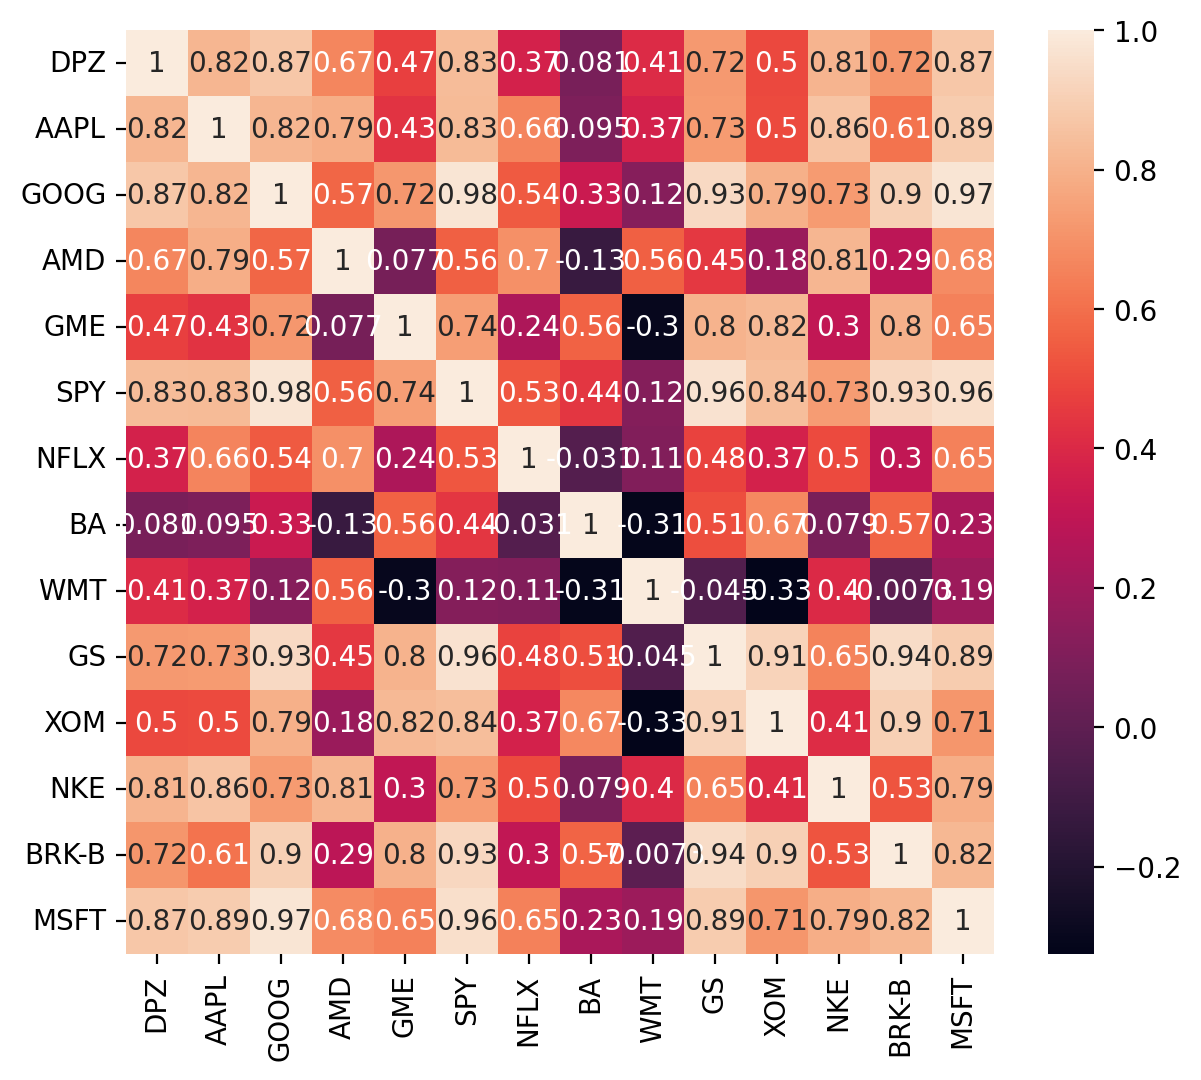

In [11]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(7,6),dpi=200)
sns.heatmap(d.corr(),annot=True)

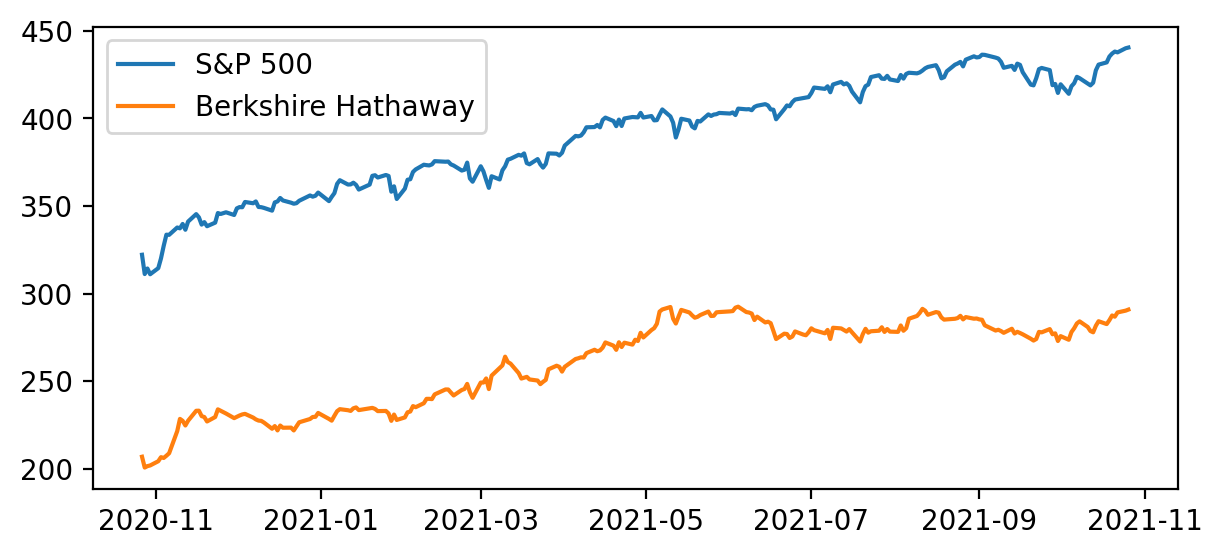

In [18]:
import matplotlib.pyplot as plt
figure(figsize=(7,3), dpi=200)
SPY = d['SPY'] # S&P 500
BRK_B = d['BRK-B'] # Berkshire Class A share
plt.plot(SPY, label = "S&P 500")
plt.plot(BRK_B, label = "Berkshire Hathaway")
plt.legend()
# The data are not 'standardized.'


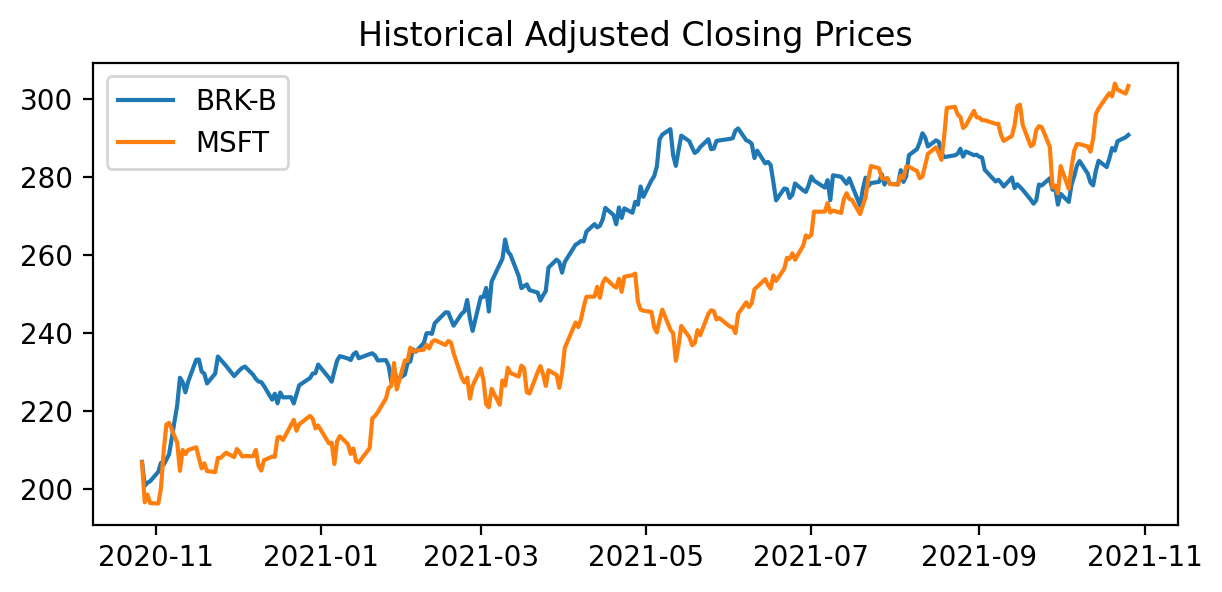

In [20]:
figure(figsize=(7,3), dpi=200)
BR_B=d['BRK-B']
MSFT=d['MSFT']
plt.plot(BR_B,label='BRK-B')
plt.plot(MSFT,label='MSFT')
plt.title('Historical Adjusted Closing Prices')
plt.legend()

Text(0.5, 1.0, 'Spread between BRK-B and MSFT')

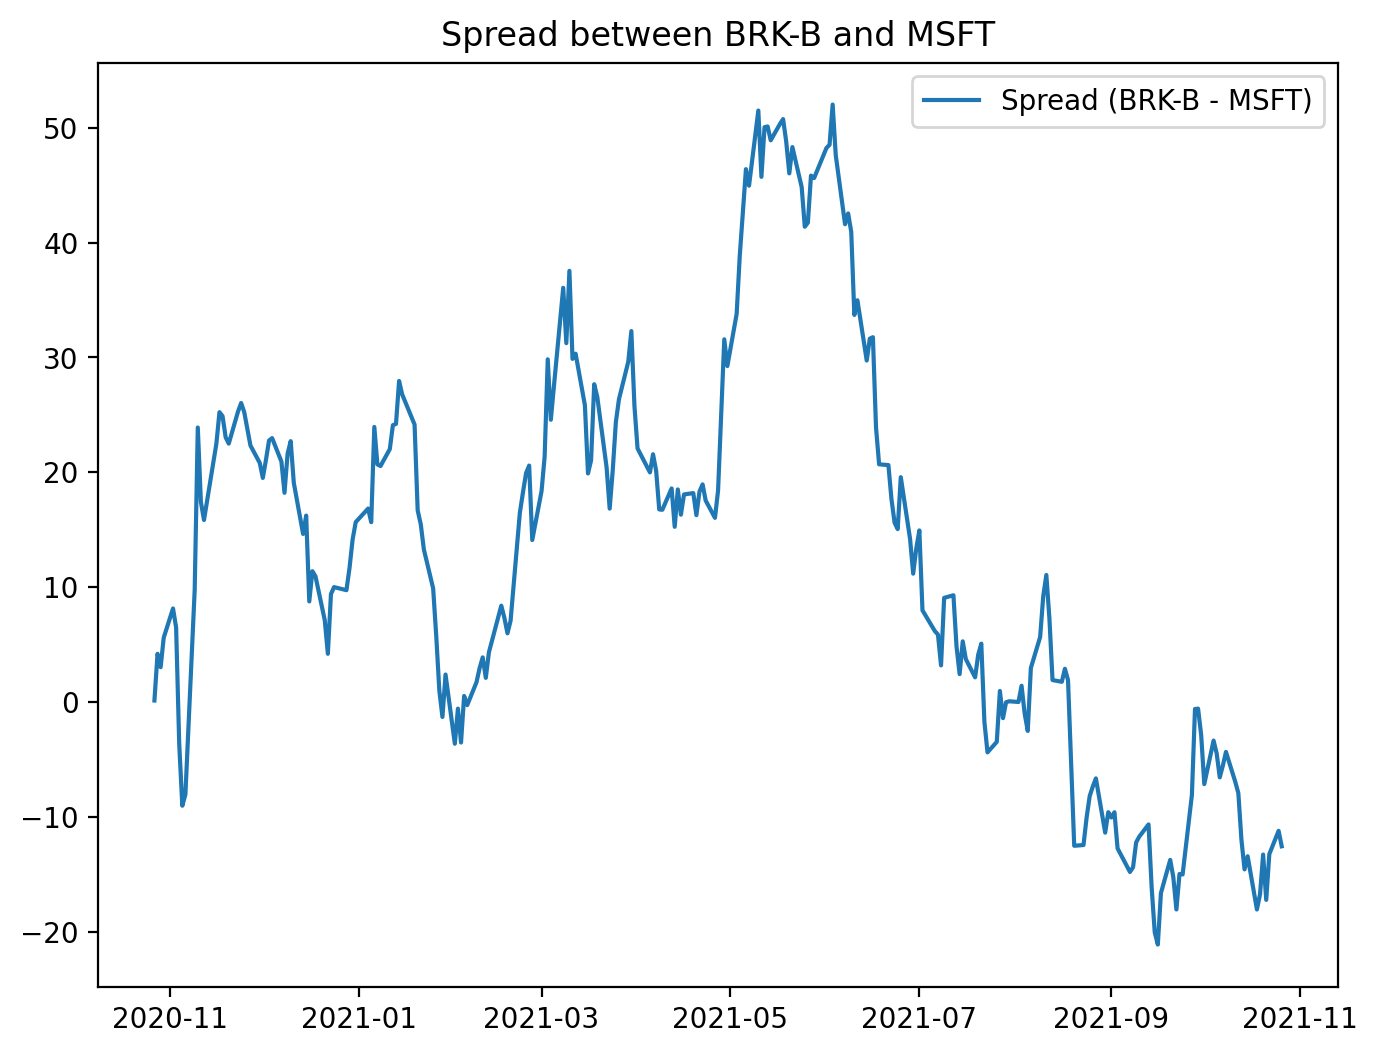

In [21]:

# plot the spread
figure(figsize=(8, 6), dpi=200)
plt.plot(BR_B - MSFT, label = 'Spread (BRK-B - MSFT)')
plt.legend()
plt.title("Spread between BRK-B and MSFT")

In [22]:
import statsmodels.tsa.stattools as ts
result=ts.coint(BR_B,MSFT) #cointegration test

In [23]:
# Cointegration test: A technique used to find a potential correlation in a time series (long term)
# Determines if the spread between the two assets are constant over time.
# Null Hypothesis: Spread between series are non-stationary.
# Uses the augmented Engle-Granger two-step cointegration test.
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.42666754636985965


In [24]:
from statsmodels.tsa.stattools import adfuller
# Compute the ADF test for Berkshire Hathaway and Microsoft
# With all time series, you want to have stationary data otherwise our data will be very hard to predict.
# ADF for Berkshire Hathaway Class B
BRK_B_ADF = adfuller(BR_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BR_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BR_B/MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Spread looks fine. If you'd want even better results, consider taking the difference (order 1) of Berkshire and MSFT

# Results: can only claim stationary for the spread (since P value < 0.05). This suggests a constant mean over time.
# Therefore, the two series are cointegrated.

P value for the Augmented Dickey-Fuller Test is 0.3736745954764997
P value for the Augmented Dickey-Fuller Test is 0.9132530916561724
P value for the Augmented Dickey-Fuller Test is 0.543651601066331
P value for the Augmented Dickey-Fuller Test is 0.44401657293628854


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

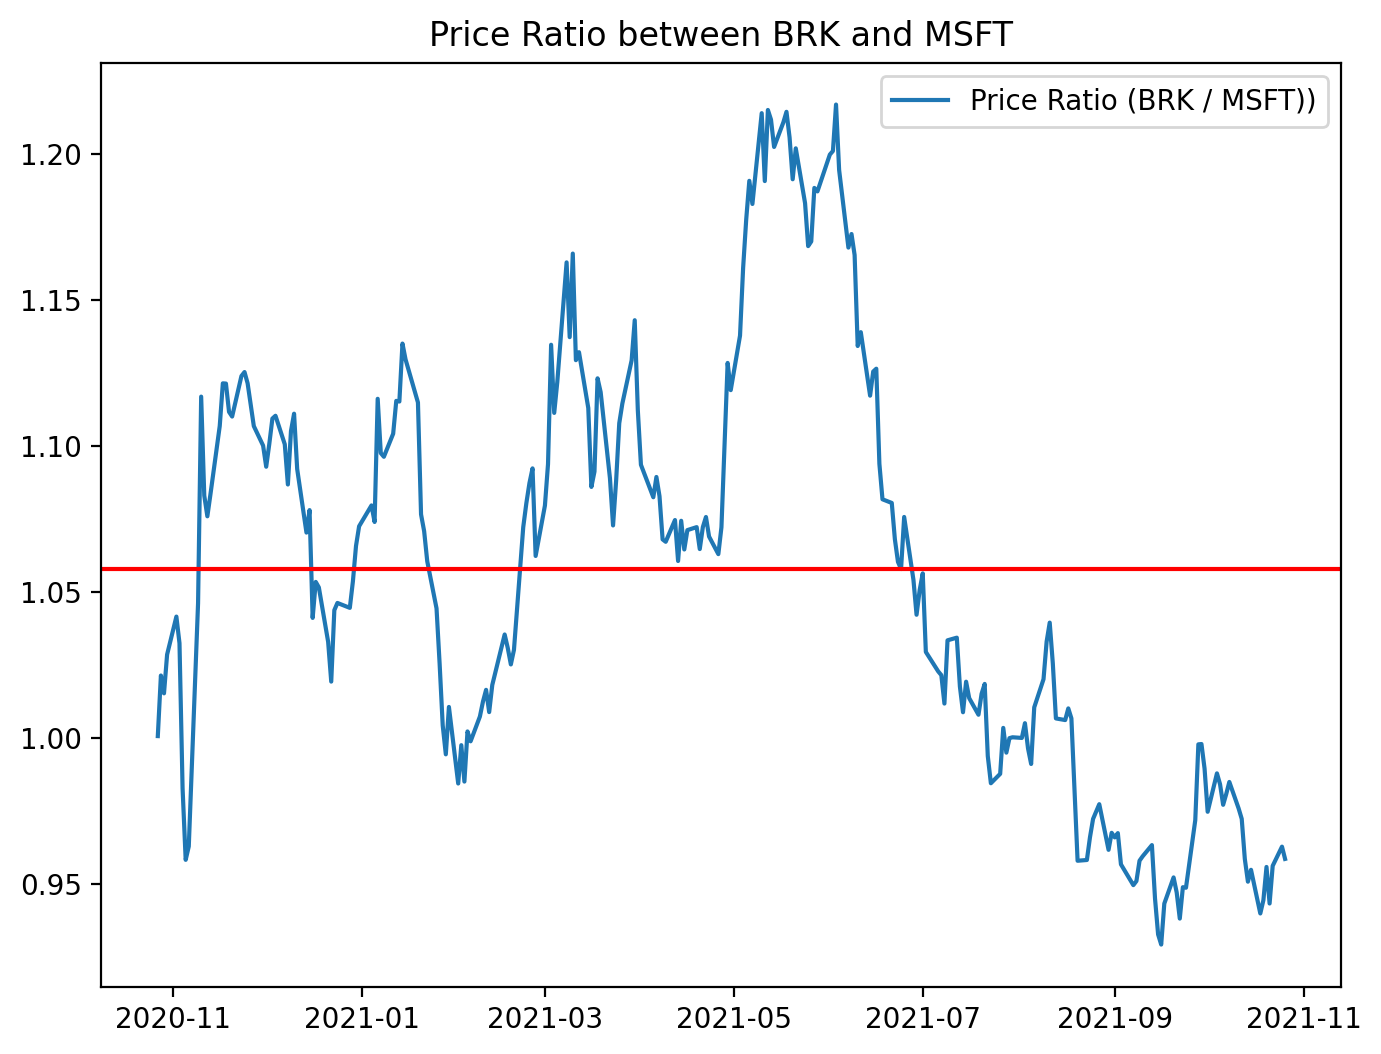

In [25]:
# Also, we can take a look at the price ratios between the two time series.
figure(figsize=(8, 6), dpi=200)
ratio = BR_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(),color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

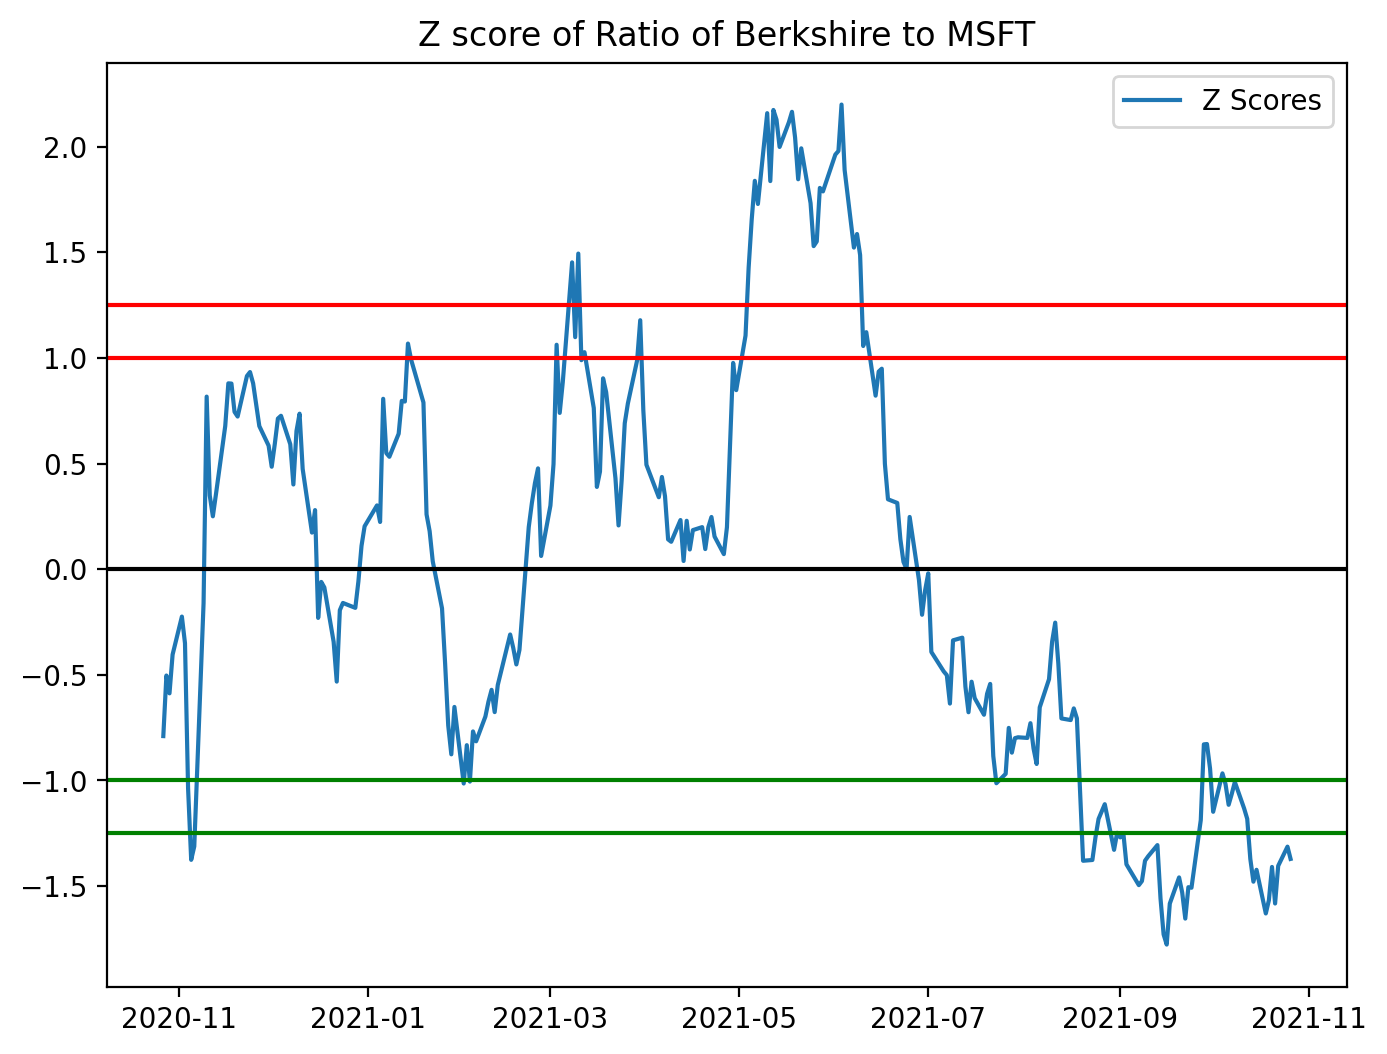

In [26]:
# NOTE, here you can either use the spread OR the Price ratio approach. Anyways, let's standardize the ratio so we can have a 
# upper and lower bound to help evaluate our trends.. Let's stick with the ratio data.
figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()
# For the most part, the range that exists outside of these 'bands' must come converge back to the mean. Thus, you can 
# determine when you can go long or short the pair (BRK_B to MSFT).

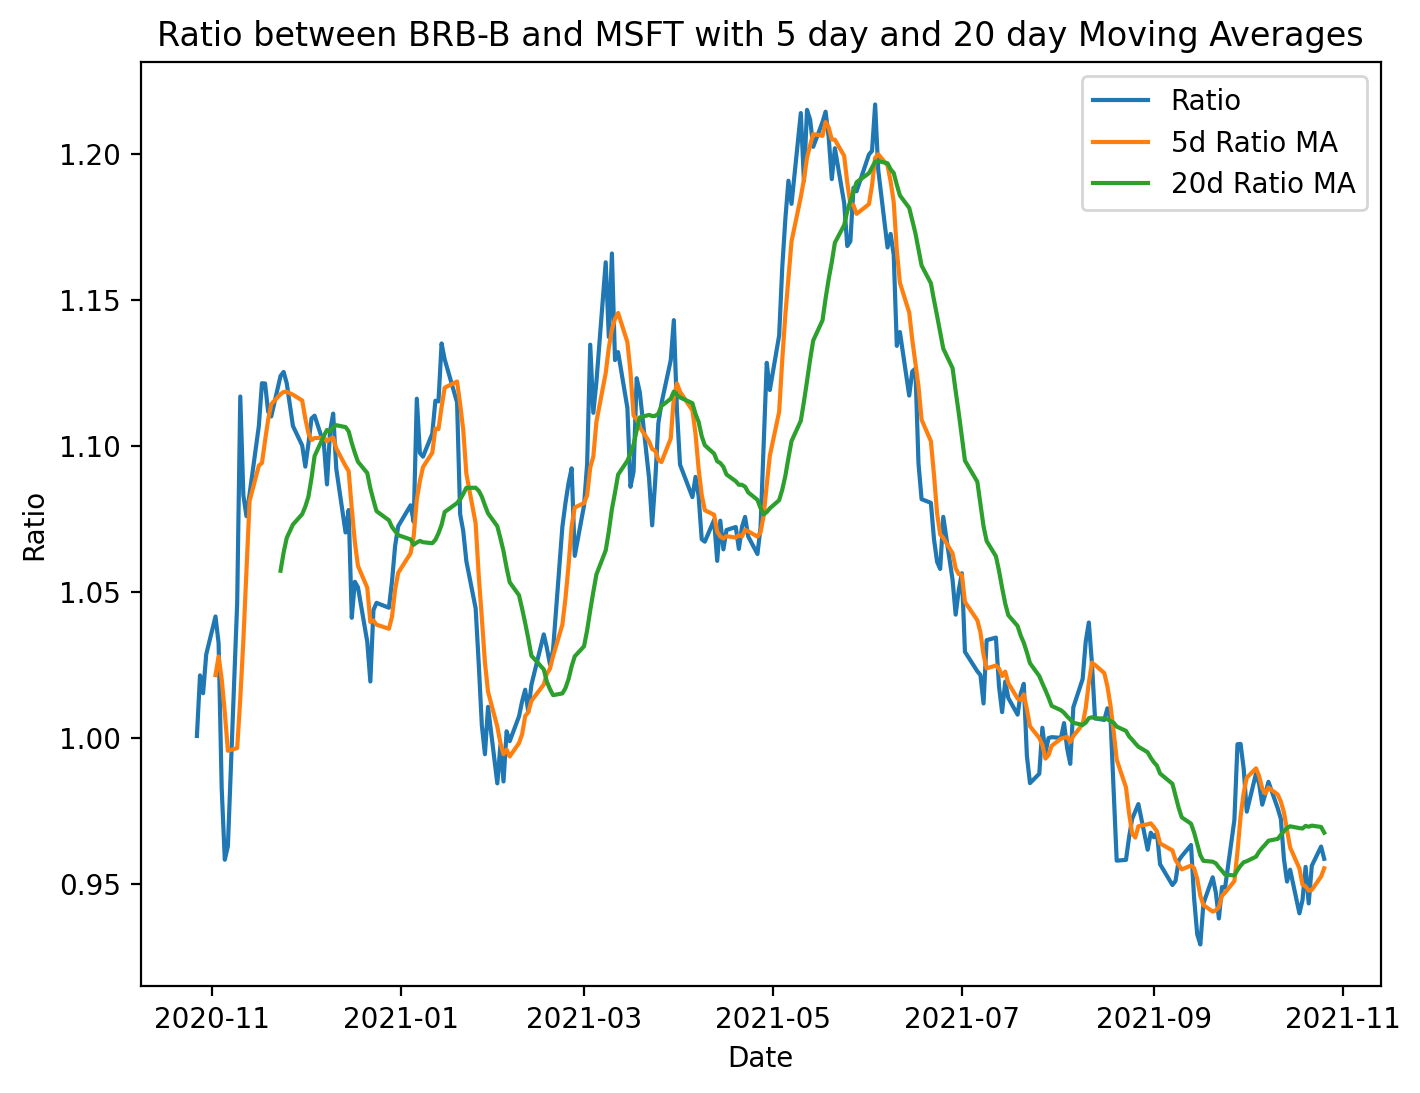

In [27]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between BRB-B and MSFT with 5 day and 20 day Moving Averages')
plt.show()

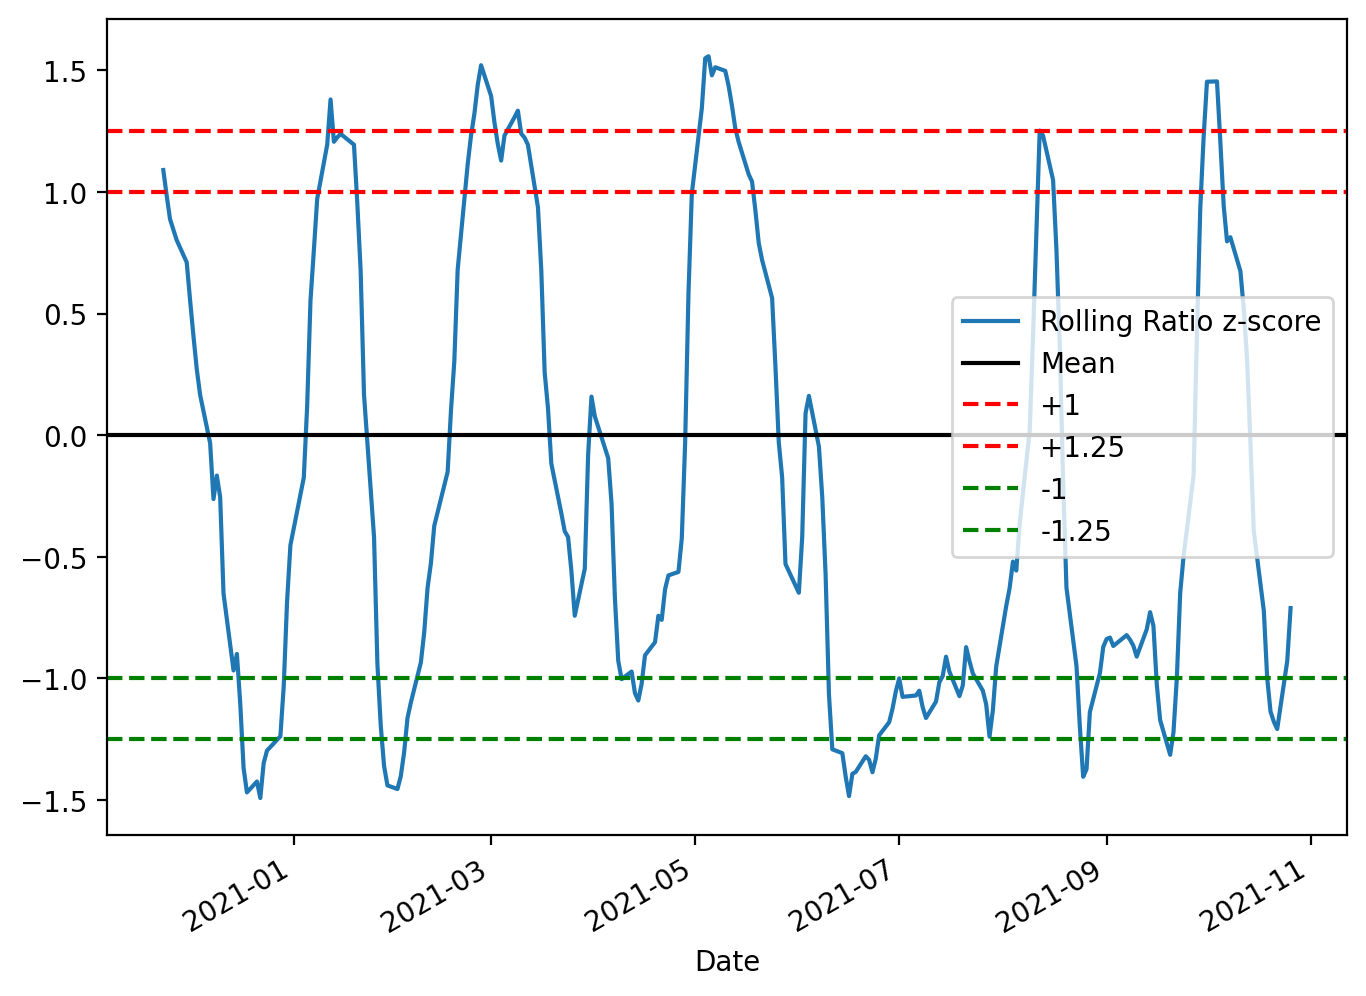

In [28]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

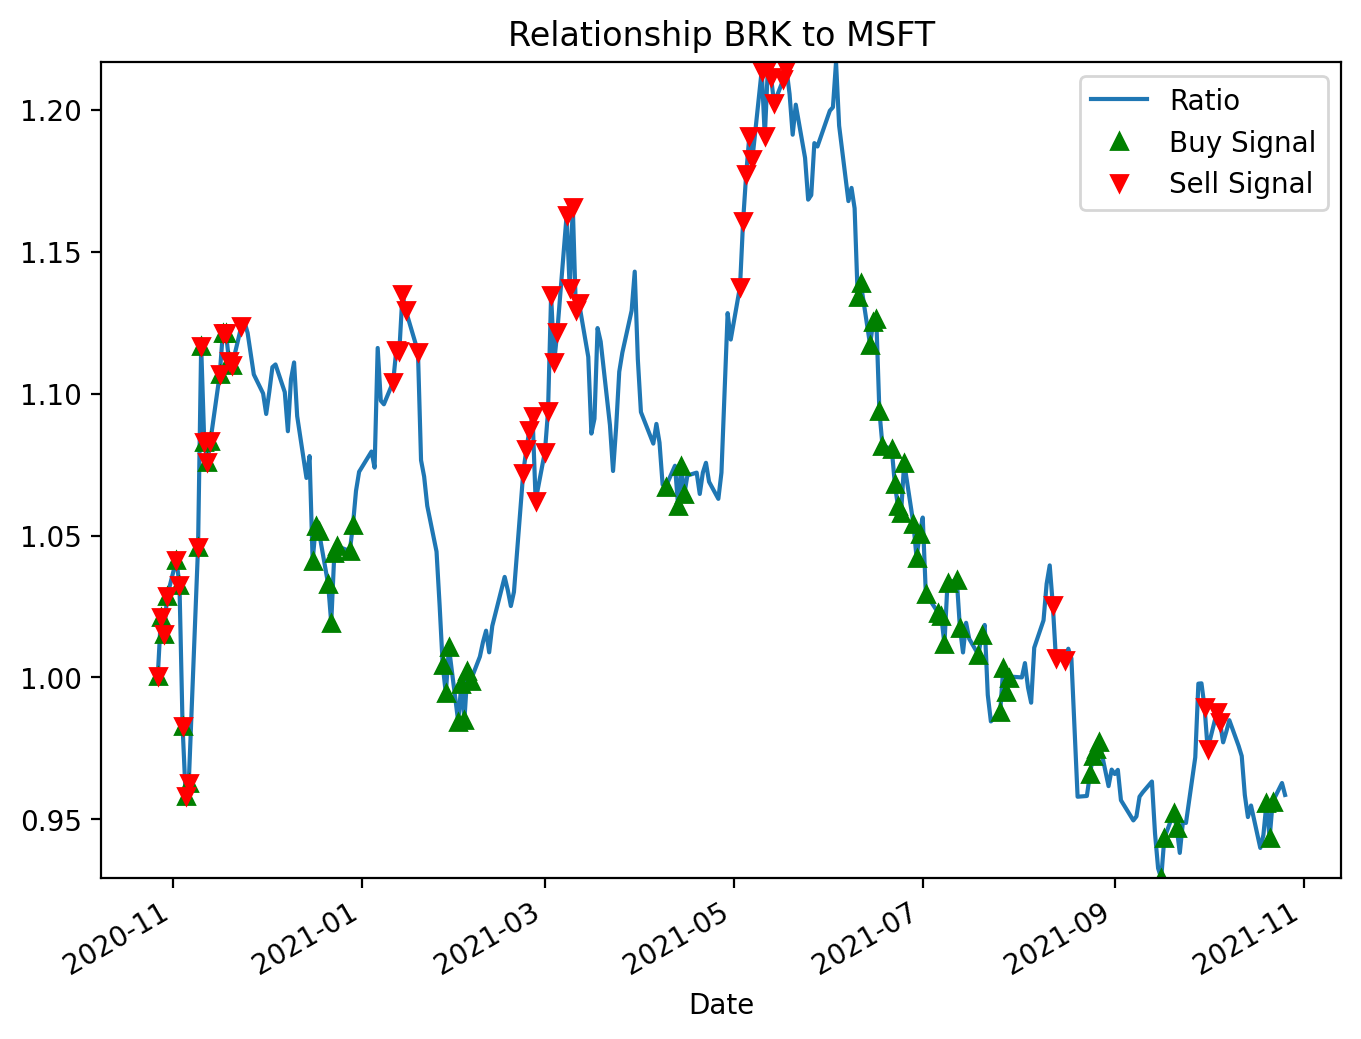

In [30]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='v')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()